In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("loan.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
print("shape of the dataset:{}".format(data.shape))

shape of the dataset:(614, 13)


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [5]:
print("columns in Dataset:",data.columns)

columns in Dataset: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


#### Checking Missing Value

In [6]:
print("if any missing Value is present")
total = data.isnull().sum()
percent = data.isnull().mean() * 100
print(total,percent)

if any missing Value is present
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64 Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64


<Figure size 720x1080 with 0 Axes>

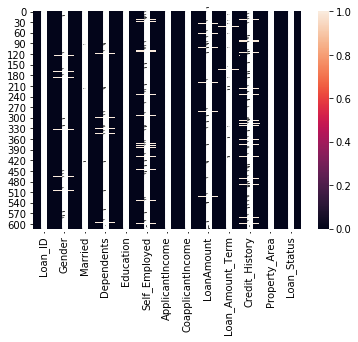

<Figure size 720x1080 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
sns.heatmap(data.isnull() ,annot= True)
plt.figure(figsize = (10,15))


In [10]:
numerical_feature = [feature for feature in data.columns if data[feature].dtype != "O"]
data[numerical_feature].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [11]:
numerical_feature_null = [feature for feature in numerical_feature if data[feature].isnull().sum() > 1]
print("percentage of value in missing Value " , data[numerical_feature_null].isnull().sum())

percentage of value in missing Value  LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64


In [12]:
def plotting_numerical(data ,feature):
    sns.distplot(data[feature].dropna())
    plt.title(feature)
    plt.figure(figsize=(10,20))
    plt.show()

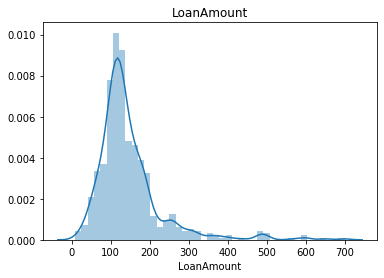

<Figure size 720x1440 with 0 Axes>

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

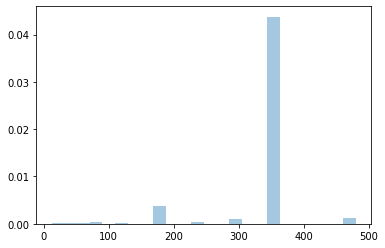

In [13]:
for feature in numerical_feature_null:
    plotting_numerical(data , feature)

In [14]:
data["LoanAmount"].dropna().sample(data["LoanAmount"].isnull().sum() ,random_state = 0)

255    255.0
278    436.0
599    192.0
151    152.0
357     67.0
473     93.0
439    138.0
607    157.0
110    136.0
365    133.0
561    600.0
246    112.0
82     167.0
478     86.0
54     286.0
89     175.0
535    126.0
15     125.0
223    175.0
67     312.0
210    214.0
358    100.0
Name: LoanAmount, dtype: float64

In [15]:
def random_impute(data , feature ,median):
    data[feature+"_median"] = data[feature].fillna(median)
    data[feature+"_random"] = data[feature]
    random_sample = data[feature].dropna().sample(data[feature].isnull().sum() ,random_state = 0)
    random_sample.index = data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature+'_random']=random_sample

In [16]:
median = data.LoanAmount.median()
random_impute(data ,"LoanAmount" ,median)


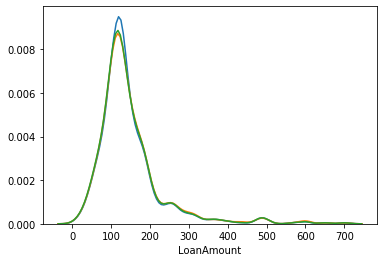

In [17]:
sns.distplot(data.LoanAmount_median,hist= False )
sns.distplot(data.LoanAmount_random,hist = False)
sns.distplot(data.LoanAmount ,hist = False)
plt.show()

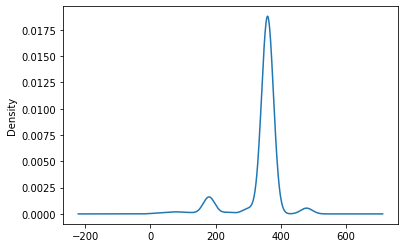

In [18]:
data["Loan_Amount_Term"].plot(kind = "kde")

In [19]:
median = data["Loan_Amount_Term"].median()
random_impute(data ,"Loan_Amount_Term" ,median)


In [20]:
data.head(50)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_median,LoanAmount_random,Loan_Amount_Term_median,Loan_Amount_Term_random
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,128.0,255.0,360.0,360.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,128.0,128.0,360.0,360.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,66.0,66.0,360.0,360.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,120.0,120.0,360.0,360.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,141.0,141.0,360.0,360.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,267.0,267.0,360.0,360.0
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,95.0,95.0,360.0,360.0
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,158.0,158.0,360.0,360.0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,168.0,168.0,360.0,360.0
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,349.0,349.0,360.0,360.0


In [21]:
data["Loan_Amount_Term_median"].dtypes
#sns.distplot(data["Loan_Amount_Term_random"],hist = False)
#sns.distplot(data["Loan_Amount_Term"] ,hist = False)
#plt.show()

dtype('float64')

(array([  3.,   6.,   3.,  44.,   4.,   0.,  13., 526.,   0.,  15.]),
 array([ 12. ,  58.8, 105.6, 152.4, 199.2, 246. , 292.8, 339.6, 386.4,
        433.2, 480. ]),
 <a list of 10 Patch objects>)

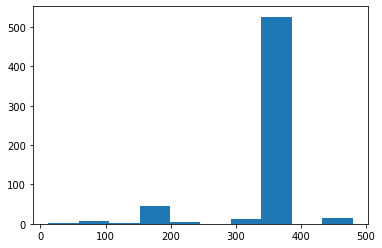

In [22]:
plt.hist(data["Loan_Amount_Term_median"])

In [23]:
def plotting(data , feature1,feature2 ,feature3):
    sns.distplot(data[feature1],hist= False )
    sns.distplot(data[feature2],hist = False)
    sns.distplot(data[feature3] ,hist = False)
    plt.show()

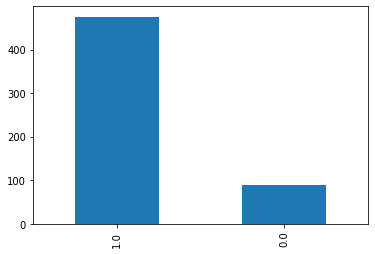

In [24]:
data.Credit_History.value_counts().plot.bar()

In [25]:
data.Credit_History.fillna(data.Credit_History.mode()[0] ,inplace = True)

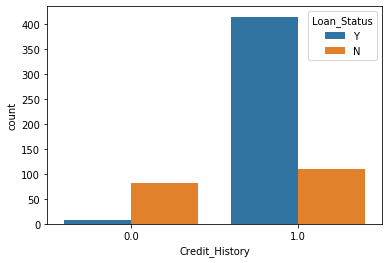

In [26]:
sns.countplot(x = "Credit_History" ,data = data ,hue = "Loan_Status" )

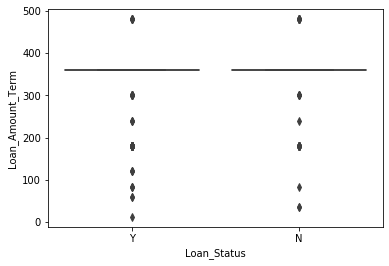

In [27]:
#if any outlier is present
sns.boxplot(y="Loan_Amount_Term" ,x = "Loan_Status" ,data = data)

In [28]:
categorical_feature = [feature for feature in data.columns if data[feature].dtype == "O" and data[feature].isnull().sum() > 0]

In [29]:
data[categorical_feature].head(10)

,Gender,Married,Dependents,Self_Employed
0,Male,No,0,No
1,Male,Yes,1,No
2,Male,Yes,0,Yes
3,Male,Yes,0,No
4,Male,No,0,No
5,Male,Yes,2,Yes
6,Male,Yes,0,No
7,Male,Yes,3+,No
8,Male,Yes,2,No
9,Male,Yes,1,No


In [30]:
for i in categorical_feature:
    print("number of unique label {}:{}".format(i ,data[i].nunique()))

number of unique label Gender:2
number of unique label Married:2
number of unique label Dependents:4
number of unique label Self_Employed:2


In [31]:
for i in categorical_feature:
    print("Total number of Value is present in this Feature")
    print("Label{}:{}".format(i ,data[i].value_counts()))

Total number of Value is present in this Feature
LabelGender:Male      489
Female    112
Name: Gender, dtype: int64
Total number of Value is present in this Feature
LabelMarried:Yes    398
No     213
Name: Married, dtype: int64
Total number of Value is present in this Feature
LabelDependents:0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Total number of Value is present in this Feature
LabelSelf_Employed:No     500
Yes     82
Name: Self_Employed, dtype: int64


In [32]:
data[categorical_feature].isnull().mean()

Gender           0.021173
Married          0.004886
Dependents       0.024430
Self_Employed    0.052117
dtype: float64

In [33]:
def categorical_fearture1(data , feature):
    mode = data[feature].mode()[0]
    data1 = data.copy()
    data[feature +"_new"] = np.where(data[feature].isnull() ,1 ,0)
    data[feature] = data[feature].fillna(mode)
    category=[]
    category.append(data[feature + "_new"])
    print(category)

In [34]:
for feature in categorical_feature:
    categorical_fearture1(data , str(feature))

[0      0
1      0
2      0
3      0
4      0
      ..
609    0
610    0
611    0
612    0
613    0
Name: Gender_new, Length: 614, dtype: int32]
[0      0
1      0
2      0
3      0
4      0
      ..
609    0
610    0
611    0
612    0
613    0
Name: Married_new, Length: 614, dtype: int32]
[0      0
1      0
2      0
3      0
4      0
      ..
609    0
610    0
611    0
612    0
613    0
Name: Dependents_new, Length: 614, dtype: int32]
[0      0
1      0
2      0
3      0
4      0
      ..
609    0
610    0
611    0
612    0
613    0
Name: Self_Employed_new, Length: 614, dtype: int32]


In [35]:
categorical_feature
for feature in categorical_feature:
    print(feature)

Gender
Married
Dependents
Self_Employed


In [36]:
print(data.shape)
data.head()

(614, 21)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Property_Area,Loan_Status,LoanAmount_median,LoanAmount_random,Loan_Amount_Term_median,Loan_Amount_Term_random,Gender_new,Married_new,Dependents_new,Self_Employed_new
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,...,Urban,Y,128.0,255.0,360.0,360.0,0,0,0,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,...,Rural,N,128.0,128.0,360.0,360.0,0,0,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,...,Urban,Y,66.0,66.0,360.0,360.0,0,0,0,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,...,Urban,Y,120.0,120.0,360.0,360.0,0,0,0,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,...,Urban,Y,141.0,141.0,360.0,360.0,0,0,0,0


In [37]:
data.isnull().sum()

Loan_ID                     0
Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History              0
Property_Area               0
Loan_Status                 0
LoanAmount_median           0
LoanAmount_random           0
Loan_Amount_Term_median     0
Loan_Amount_Term_random     0
Gender_new                  0
Married_new                 0
Dependents_new              0
Self_Employed_new           0
dtype: int64

In [38]:
#Dropping the columns as Loan_amount and Loan_Amount_term
data.drop(columns = ["LoanAmount" ,"Loan_Amount_Term"] ,axis = 1, inplace = True)
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,Property_Area,Loan_Status,LoanAmount_median,LoanAmount_random,Loan_Amount_Term_median,Loan_Amount_Term_random,Gender_new,Married_new,Dependents_new,Self_Employed_new
0,LP001002,Male,No,0,Graduate,No,5849,0.0,1.0,Urban,Y,128.0,255.0,360.0,360.0,0,0,0,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,1.0,Rural,N,128.0,128.0,360.0,360.0,0,0,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,1.0,Urban,Y,66.0,66.0,360.0,360.0,0,0,0,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,1.0,Urban,Y,120.0,120.0,360.0,360.0,0,0,0,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,1.0,Urban,Y,141.0,141.0,360.0,360.0,0,0,0,0


In [39]:
def categorical_analysis_count(data , feature ,hue):
    plt.figure(figsize = (20,20))
    sns.countplot(x = feature , hue = hue , data = data)
    plt.title(feature)
    plt.show()

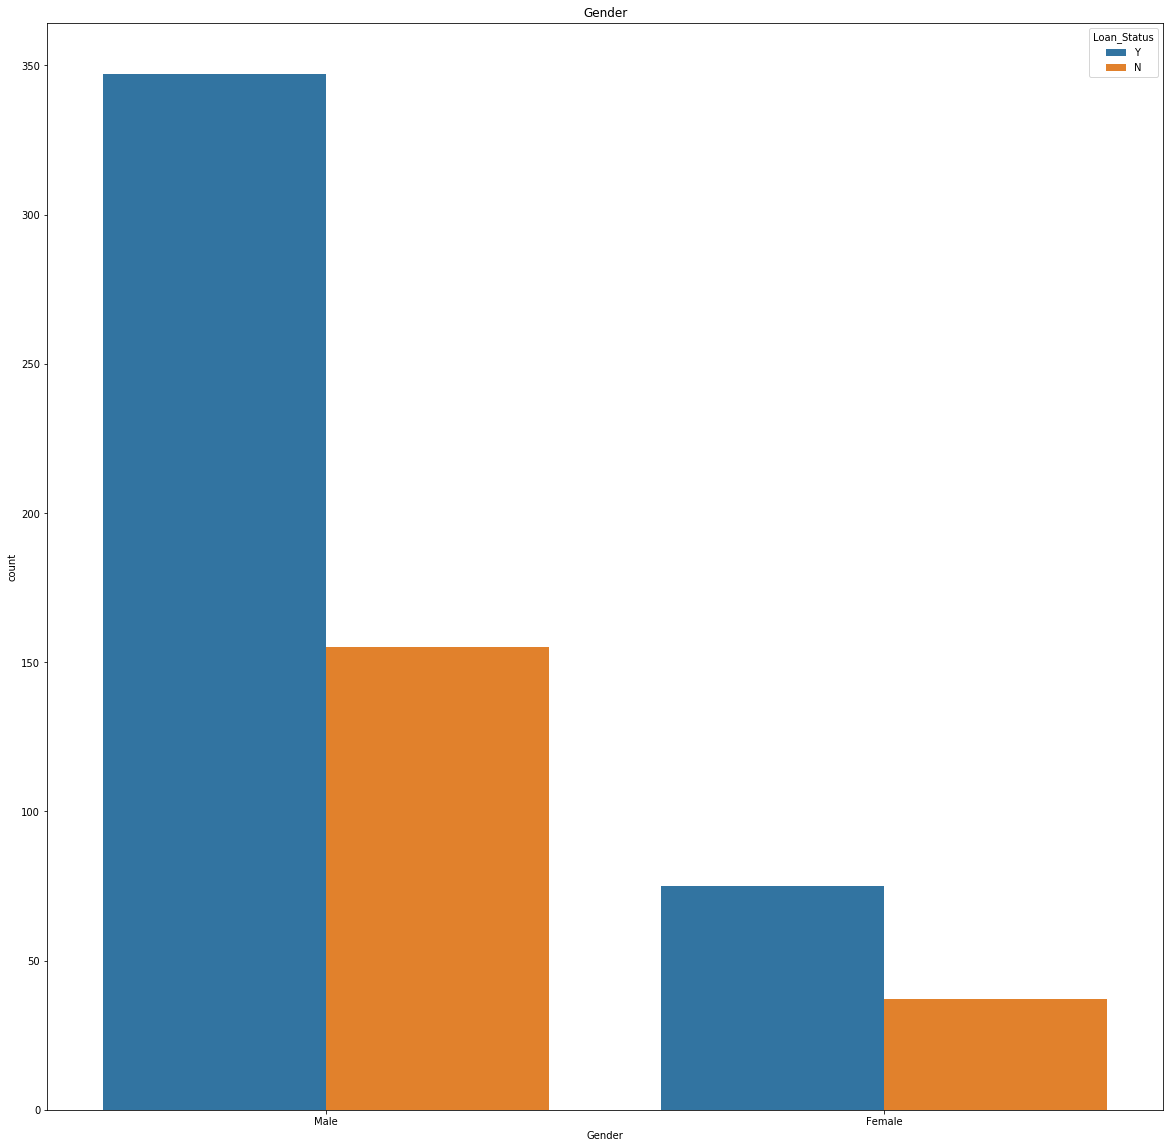

In [40]:
categorical_analysis_count(data ,"Gender" ,"Loan_Status")

In [41]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'Credit_History', 'Property_Area', 'Loan_Status', 'LoanAmount_median',
       'LoanAmount_random', 'Loan_Amount_Term_median',
       'Loan_Amount_Term_random', 'Gender_new', 'Married_new',
       'Dependents_new', 'Self_Employed_new'],
      dtype='object')

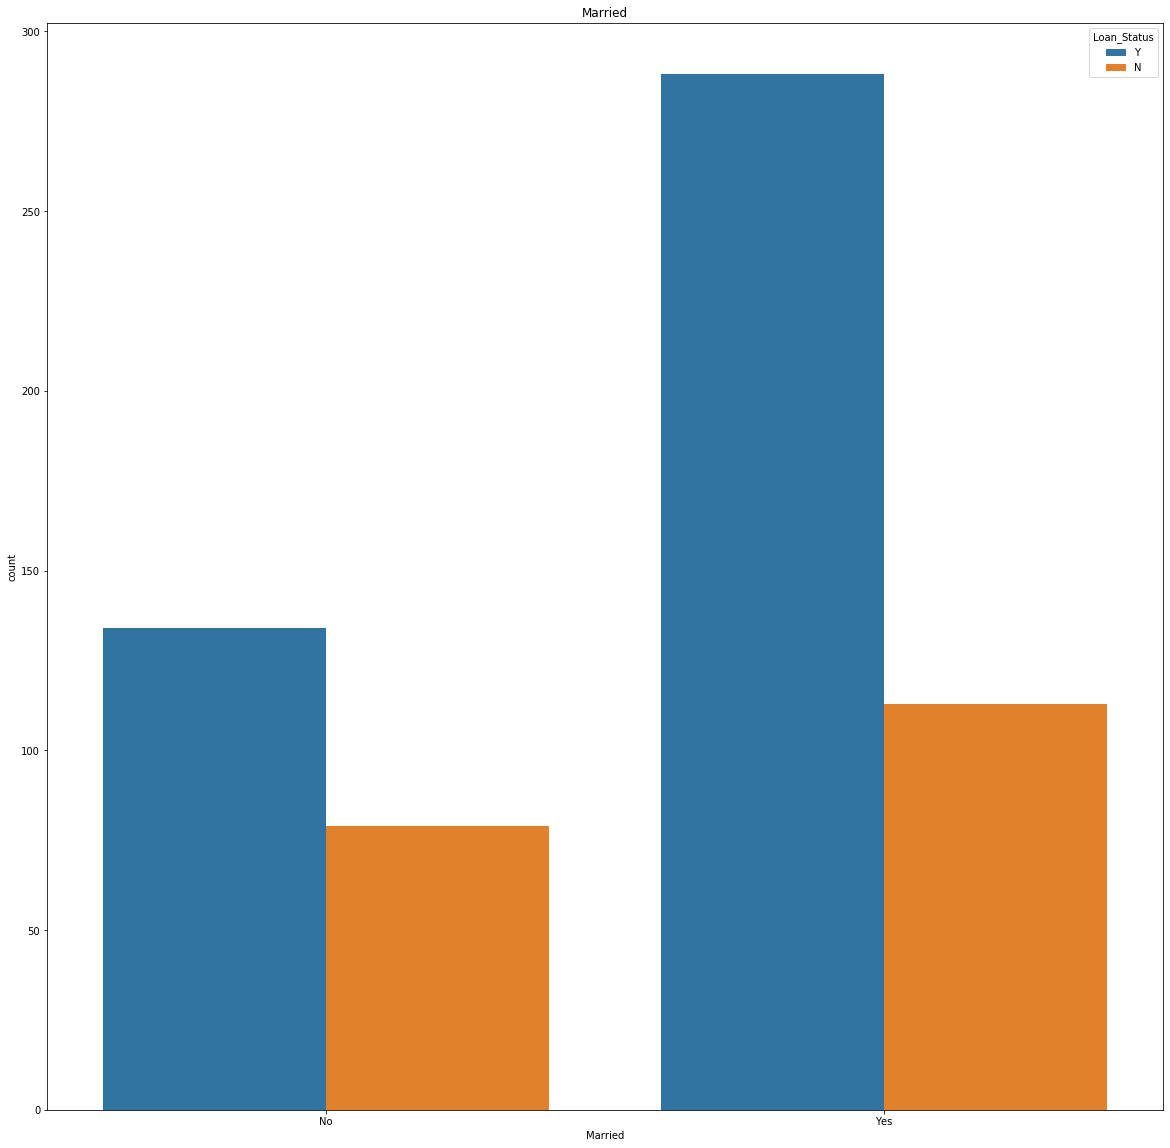

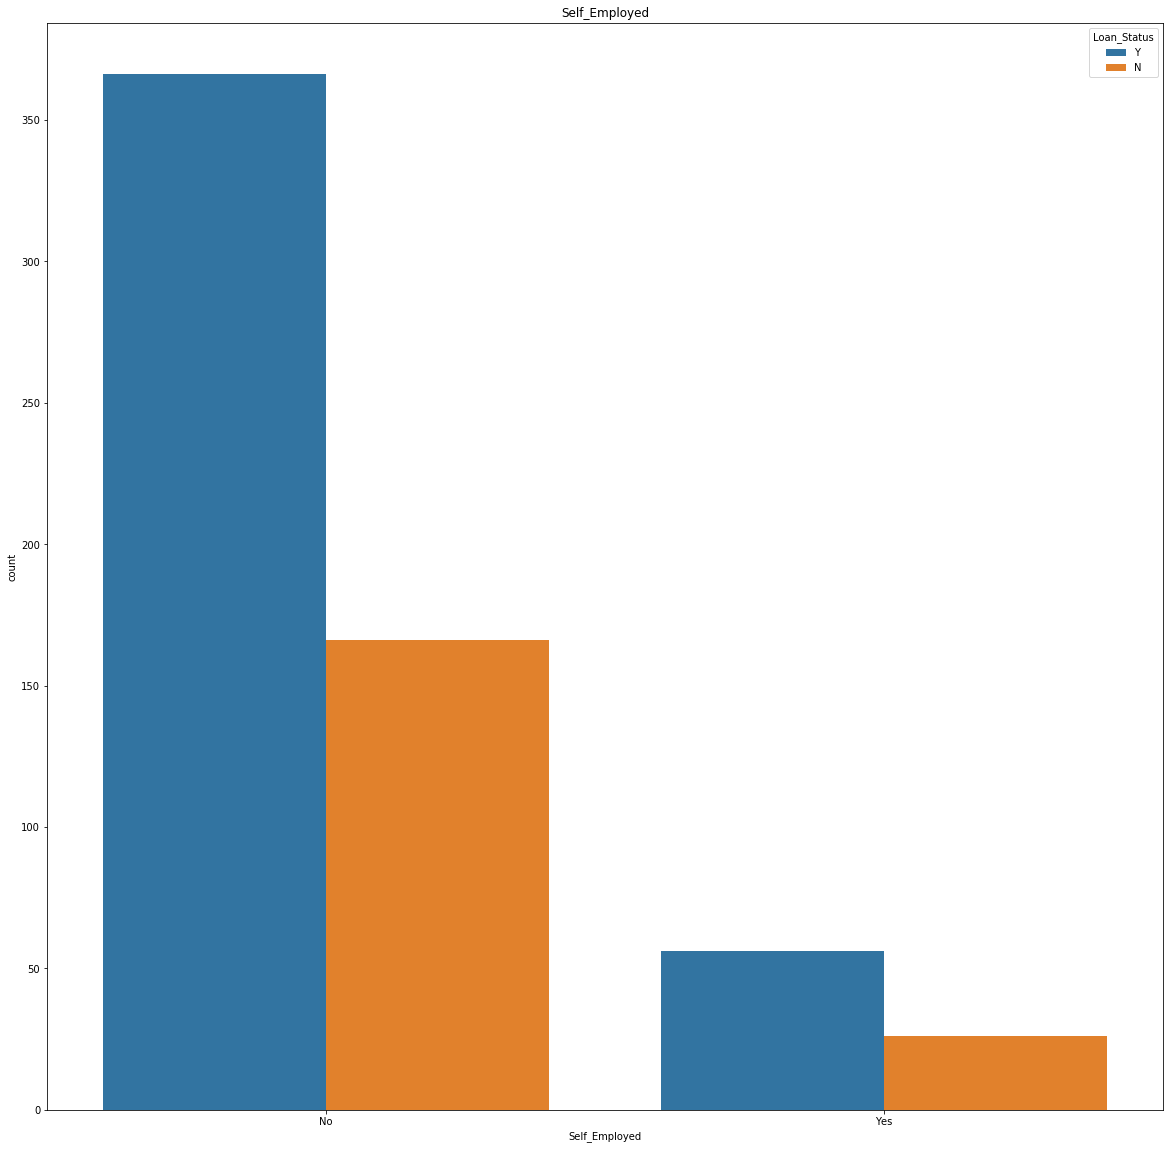

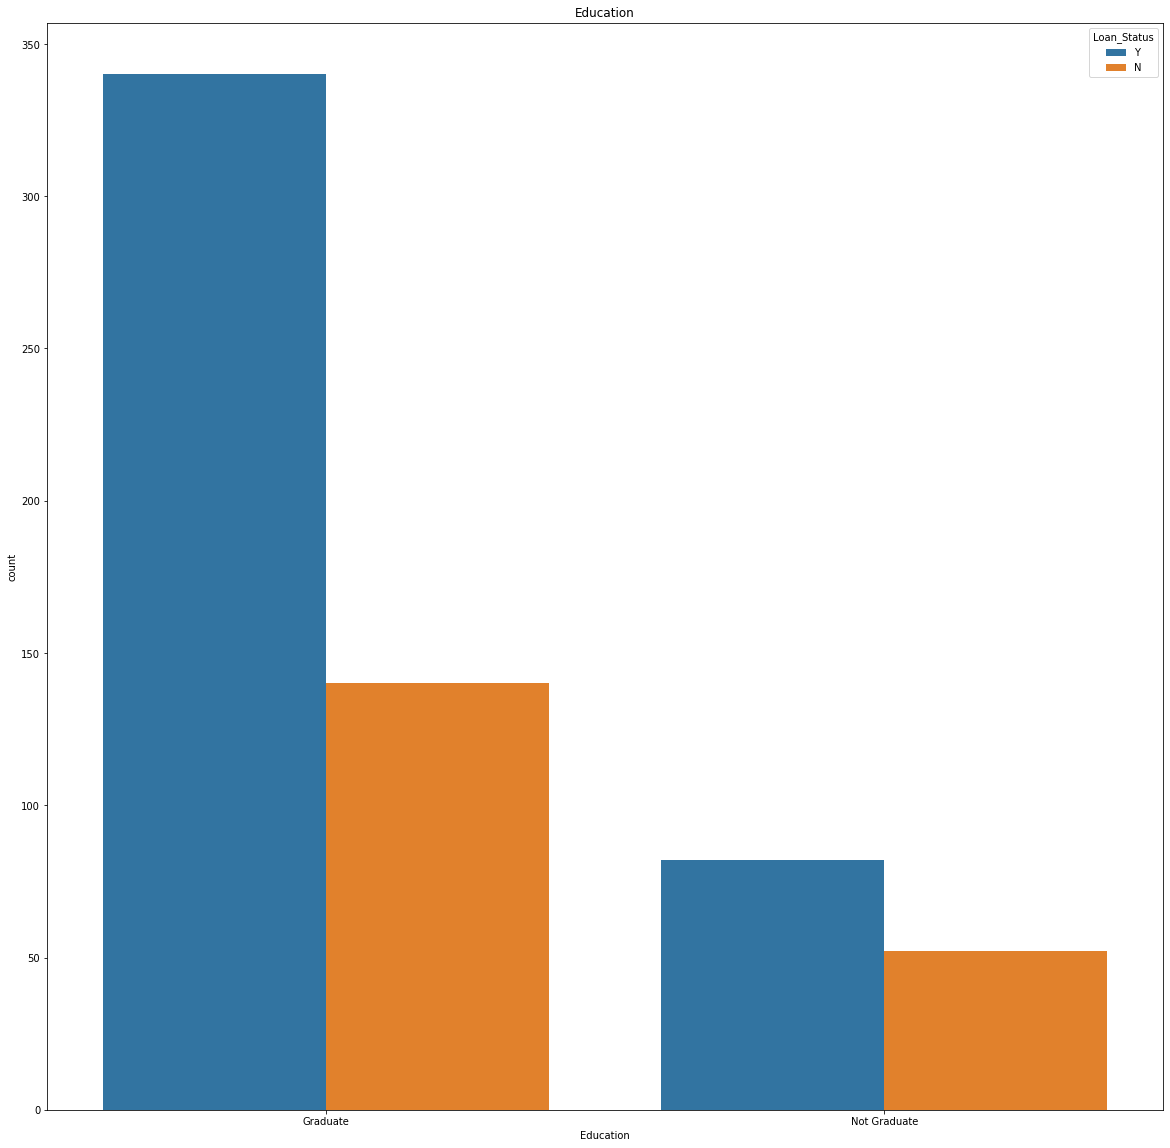

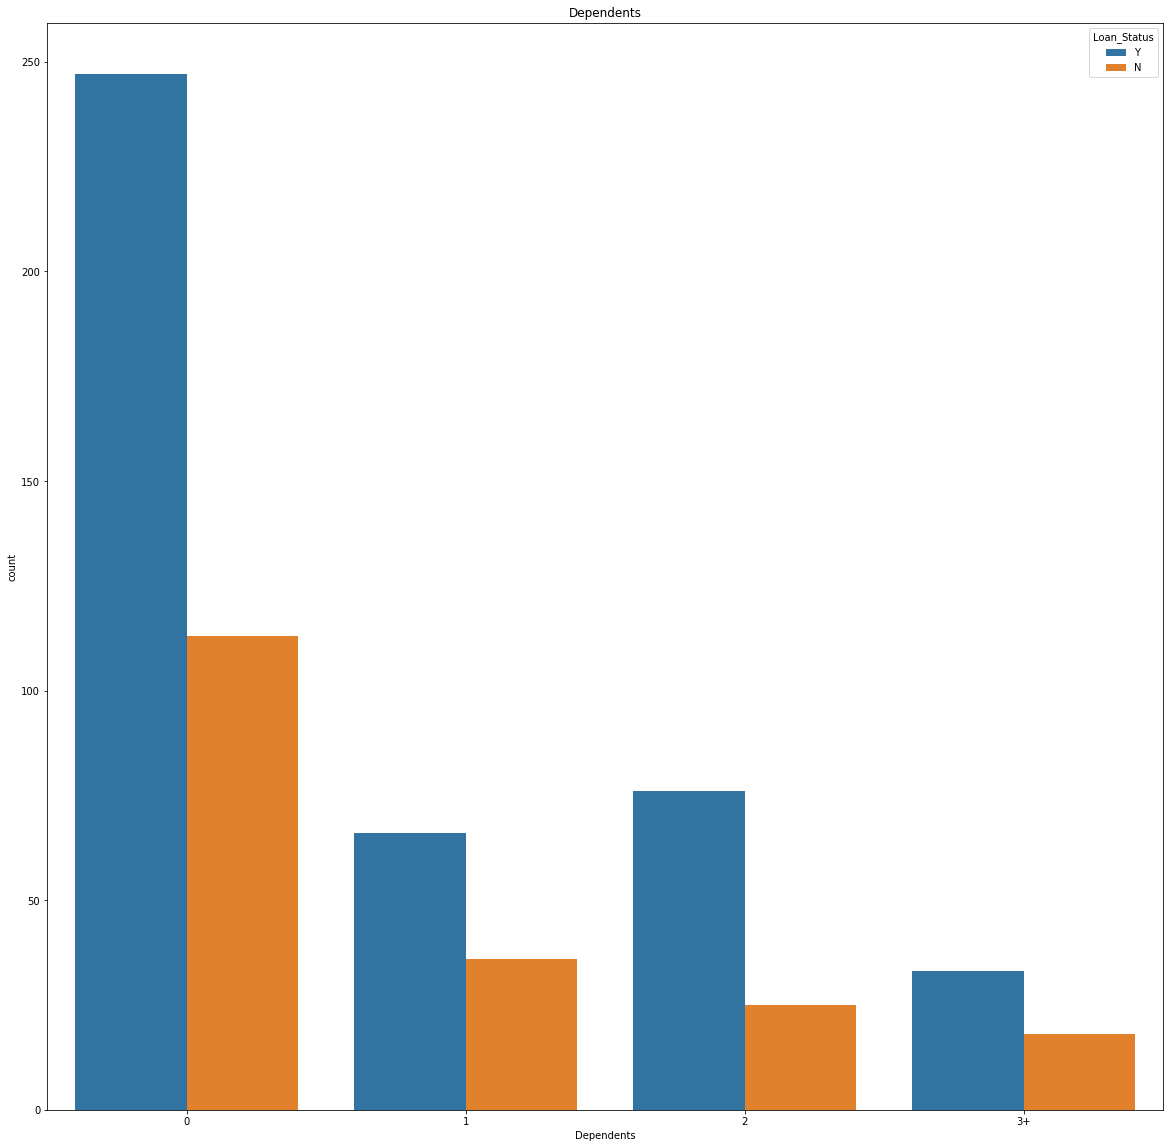

In [42]:
categorical_analysis_count(data ,"Married" ,"Loan_Status")
categorical_analysis_count(data ,"Self_Employed" ,"Loan_Status")
categorical_analysis_count(data ,"Education" ,"Loan_Status")
categorical_analysis_count(data ,"Dependents" ,"Loan_Status")

IndexError: index 0 is out of bounds for axis 0 with size 0

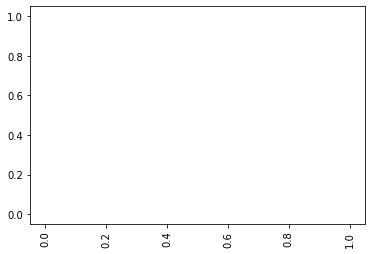

In [103]:
data["Loan_Status"] = data["Loan_Status"].map({"Y":1 , "N":0})


In [105]:
df1.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [47]:
#Hanling Categorical_value
categorical_Rank = [feature for feature in data.columns if data[feature].dtype=="O" and feature != "Loan_Status"]

In [48]:
data[categorical_Rank].head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
Loan_ID,,,,,,
LP001002,Male,No,0,Graduate,No,Urban
LP001003,Male,Yes,1,Graduate,No,Rural
LP001005,Male,Yes,0,Graduate,Yes,Urban
LP001006,Male,Yes,0,Not Graduate,No,Urban
LP001008,Male,No,0,Graduate,No,Urban


In [46]:
data = data.set_index("Loan_ID")
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,Property_Area,Loan_Status,LoanAmount_median,LoanAmount_random,Loan_Amount_Term_median,Loan_Amount_Term_random,Gender_new,Married_new,Dependents_new,Self_Employed_new
Loan_ID,,,,,,,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,1.0,Urban,1,128.0,255.0,360.0,360.0,0,0,0,0
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,1.0,Rural,0,128.0,128.0,360.0,360.0,0,0,0,0
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,1.0,Urban,1,66.0,66.0,360.0,360.0,0,0,0,0
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,1.0,Urban,1,120.0,120.0,360.0,360.0,0,0,0,0
LP001008,Male,No,0,Graduate,No,6000,0.0,1.0,Urban,1,141.0,141.0,360.0,360.0,0,0,0,0


#select a Unique Columns

In [49]:
for feature in categorical_Rank:
    print("Unique feature in Each Label {}:{}".format(feature ,data[feature].unique()))
    print("Total Unique Label{}:{}".format(feature ,len(data[feature].unique())))
    print()

Unique feature in Each Label Gender:['Male' 'Female']
Total Unique LabelGender:2

Unique feature in Each Label Married:['No' 'Yes']
Total Unique LabelMarried:2

Unique feature in Each Label Dependents:['0' '1' '2' '3+']
Total Unique LabelDependents:4

Unique feature in Each Label Education:['Graduate' 'Not Graduate']
Total Unique LabelEducation:2

Unique feature in Each Label Self_Employed:['No' 'Yes']
Total Unique LabelSelf_Employed:2

Unique feature in Each Label Property_Area:['Urban' 'Rural' 'Semiurban']
Total Unique LabelProperty_Area:3



In [52]:
ordered_label = data.groupby("Self_Employed")["Loan_Status"].mean().sort_values().index
ordered_label

Index(['Yes', 'No'], dtype='object', name='Self_Employed')

In [59]:
dummy = data.Self_Employed.value_counts().sort_values().index
dummy

Index(['Yes', 'No'], dtype='object')

In [60]:
def Ranked(data , features):
    ordered_label = data.groupby(feature)["Loan_Status"].mean().sort_values().index
    ordered_labels ={k:i for i,k in enumerate(ordered_label,0)} 
    data[feature] = data[feature].map(ordered_labels)

In [61]:
for feature in categorical_Rank:
    Ranked(data ,feature)

In [62]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,Property_Area,Loan_Status,LoanAmount_median,LoanAmount_random,Loan_Amount_Term_median,Loan_Amount_Term_random,Gender_new,Married_new,Dependents_new,Self_Employed_new
Loan_ID,,,,,,,,,,,,,,,,,,
LP001002,1,0,2,1,1,5849,0.0,1.0,1,1,128.0,255.0,360.0,360.0,0,0,0,0
LP001003,1,1,0,1,1,4583,1508.0,1.0,0,0,128.0,128.0,360.0,360.0,0,0,0,0
LP001005,1,1,2,1,0,3000,0.0,1.0,1,1,66.0,66.0,360.0,360.0,0,0,0,0
LP001006,1,1,2,0,1,2583,2358.0,1.0,1,1,120.0,120.0,360.0,360.0,0,0,0,0
LP001008,1,0,2,1,1,6000,0.0,1.0,1,1,141.0,141.0,360.0,360.0,0,0,0,0


###OUTLIER HANDLING

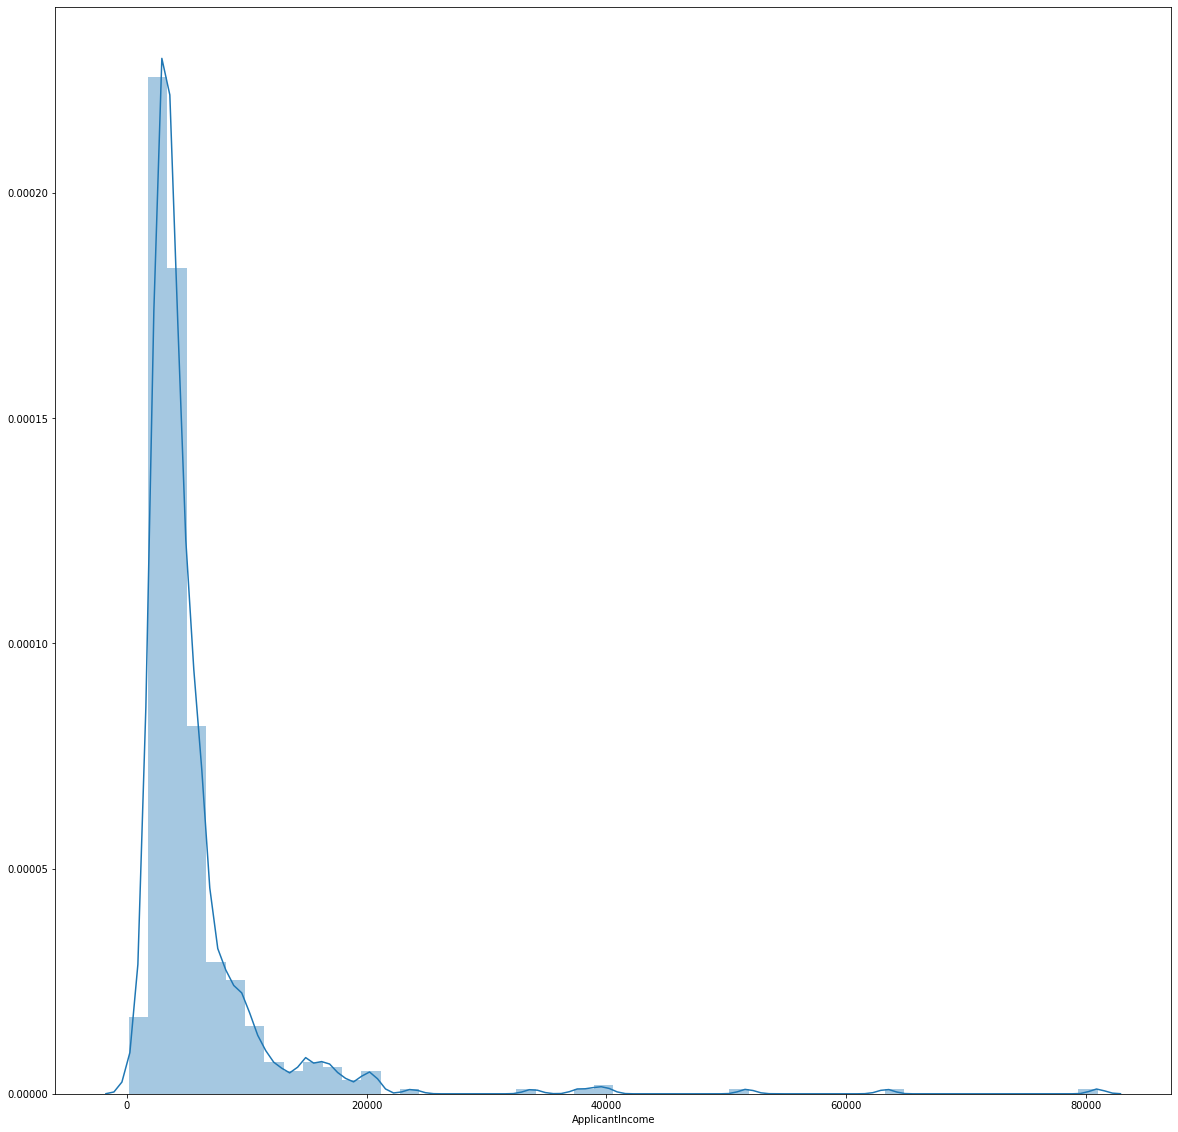

In [63]:
plt.figure(figsize=(20,20))
sns.distplot(data["ApplicantIncome"])
plt.show()

In [64]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,Property_Area,Loan_Status,LoanAmount_median,LoanAmount_random,Loan_Amount_Term_median,Loan_Amount_Term_random,Gender_new,Married_new,Dependents_new,Self_Employed_new
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,1.749186,0.781759,0.866450,5403.459283,1621.245798,0.855049,1.087948,0.687296,145.752443,148.066775,342.410423,341.726384,0.021173,0.004886,0.024430,0.052117
std,0.386497,0.476373,0.922242,0.413389,0.340446,6109.041673,2926.248369,0.352339,0.815081,0.463973,84.107233,87.581556,64.428629,65.639408,0.144077,0.069786,0.154506,0.222445
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.000000,0.000000,0.000000,9.000000,9.000000,12.000000,12.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000,1.000000,1.000000,2877.500000,0.000000,1.000000,0.000000,0.000000,100.250000,100.000000,360.000000,360.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,2.000000,1.000000,1.000000,3812.500000,1188.500000,1.000000,1.000000,1.000000,128.000000,128.000000,360.000000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,2.000000,1.000000,1.000000,5795.000000,2297.250000,1.000000,2.000000,1.000000,164.750000,170.000000,360.000000,360.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,1.000000,2.000000,1.000000,700.000000,700.000000,480.000000,480.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
IQR = data["ApplicantIncome"].quantile(0.75) - data["ApplicantIncome"].quantile(0.25)
upper = data["ApplicantIncome"].quantile(0.75) + (3 * IQR)
lower = data["ApplicantIncome"].quantile(0.25) - (3 * IQR)
mean = data["ApplicantIncome"].mean()
print(upper ,lower ,IQR , mean)

14547.5 -5875.0 2917.5 5403.459283387622


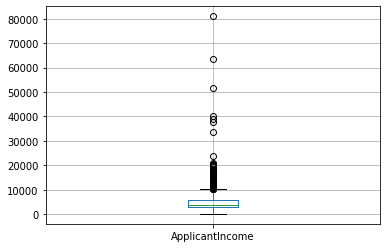

In [66]:
data.boxplot(column="ApplicantIncome")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000086D8248308>]],
      dtype=object)

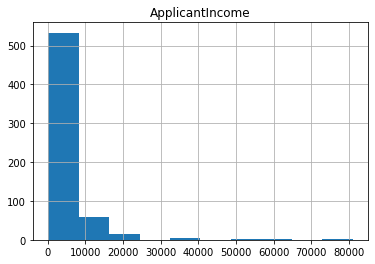

In [67]:
data.hist(column = "ApplicantIncome")

In [68]:
IQR = data["ApplicantIncome"].quantile(0.75) - data["ApplicantIncome"].quantile(0.25)
upper = data["ApplicantIncome"].quantile(0.75) + (1.5 * IQR)
lower = data["ApplicantIncome"].quantile(0.25) - (1.5 * IQR)
mean = data["ApplicantIncome"].mean()
print(upper ,lower ,IQR , mean)

10171.25 -1498.75 2917.5 5403.459283387622


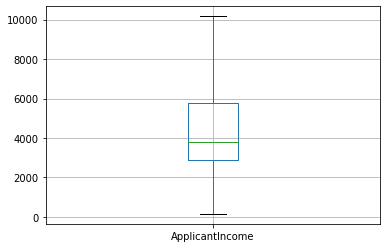

In [69]:
data.loc[data["ApplicantIncome"] > upper , "ApplicantIncome"] = upper
data.boxplot(column = "ApplicantIncome")

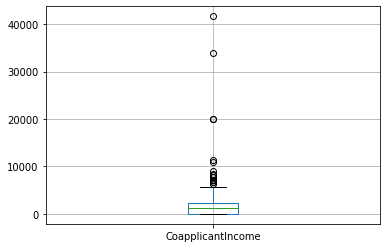

In [70]:
data.boxplot(column = "CoapplicantIncome")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000086D83B72C8>]],
      dtype=object)

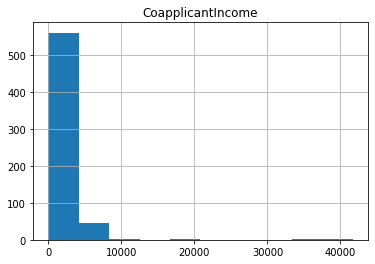

In [71]:
data.hist(column = "CoapplicantIncome")


In [72]:
IQR = data["CoapplicantIncome"].quantile(0.75) - data["CoapplicantIncome"].quantile(0.25)
upper = data["CoapplicantIncome"].quantile(0.75) + (3 * IQR)
lower = data["CoapplicantIncome"].quantile(0.25) - (3 * IQR)
print(upper,lower)

9189.0 -6891.75


In [73]:
IQR = data["CoapplicantIncome"].quantile(0.75) - data["CoapplicantIncome"].quantile(0.25)
upper1 = data["CoapplicantIncome"].quantile(0.75) + (1.5 * IQR)
lower = data["CoapplicantIncome"].quantile(0.25) - (1.5 * IQR)
print(upper1,lower)

5743.125 -3445.875


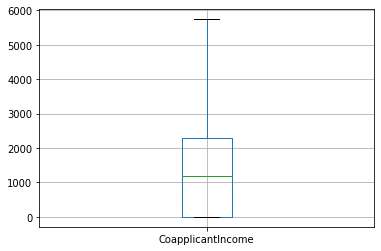

In [74]:
data.loc[data["CoapplicantIncome"] > upper1 , "CoapplicantIncome" ] = upper1
data.boxplot(column = "CoapplicantIncome")

In [78]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,Property_Area,Loan_Status,LoanAmount_random,Loan_Amount_Term_random,Gender_new,Married_new,Dependents_new,Self_Employed_new
Loan_ID,,,,,,,,,,,,,,,,
LP001002,1,0,2,1,1,5849.0,0.0,1.0,1,1,255.0,360.0,0,0,0,0
LP001003,1,1,0,1,1,4583.0,1508.0,1.0,0,0,128.0,360.0,0,0,0,0
LP001005,1,1,2,1,0,3000.0,0.0,1.0,1,1,66.0,360.0,0,0,0,0
LP001006,1,1,2,0,1,2583.0,2358.0,1.0,1,1,120.0,360.0,0,0,0,0
LP001008,1,0,2,1,1,6000.0,0.0,1.0,1,1,141.0,360.0,0,0,0,0


In [77]:
df = data.copy()
data.drop(columns = ["LoanAmount_median" ,"Loan_Amount_Term_median"] ,axis = 1 ,inplace = True)


KeyError: "['LoanAmount_median' 'Loan_Amount_Term_median'] not found in axis"

In [79]:
df1 = data.copy()
def norm(df ,feature):
    df[feature] = np.log(df[feature])
    return df

In [80]:
for feature in columns:
    norm(df, feature)

NameError: name 'columns' is not defined

In [81]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,Property_Area,Loan_Status,LoanAmount_random,Loan_Amount_Term_random,Gender_new,Married_new,Dependents_new,Self_Employed_new
Loan_ID,,,,,,,,,,,,,,,,
LP001002,1,0,2,1,1,5849.0,0.0,1.0,1,1,255.0,360.0,0,0,0,0
LP001003,1,1,0,1,1,4583.0,1508.0,1.0,0,0,128.0,360.0,0,0,0,0
LP001005,1,1,2,1,0,3000.0,0.0,1.0,1,1,66.0,360.0,0,0,0,0
LP001006,1,1,2,0,1,2583.0,2358.0,1.0,1,1,120.0,360.0,0,0,0,0
LP001008,1,0,2,1,1,6000.0,0.0,1.0,1,1,141.0,360.0,0,0,0,0


In [82]:
df["CoapplicantIncome_new"] = np.where(df["CoapplicantIncome"]==0.0 ,df["CoapplicantIncome"].mean() , df["CoapplicantIncome"])
df["CoapplicantIncome_new"].head()

Loan_ID
LP001002    1419.702231
LP001003    1508.000000
LP001005    1419.702231
LP001006    2358.000000
LP001008    1419.702231
Name: CoapplicantIncome_new, dtype: float64

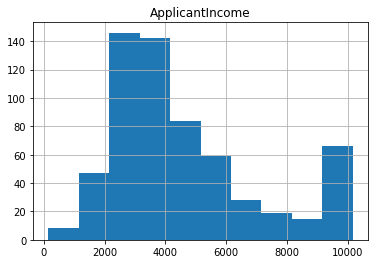

<Figure size 1440x1440 with 0 Axes>

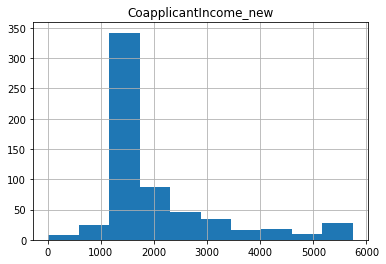

<Figure size 1440x1440 with 0 Axes>

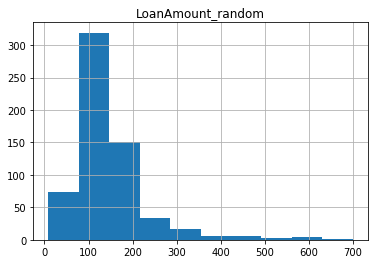

<Figure size 1440x1440 with 0 Axes>

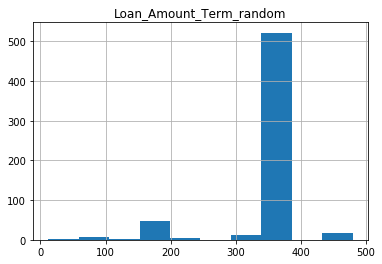

<Figure size 1440x1440 with 0 Axes>

In [83]:
columns = ["ApplicantIncome","CoapplicantIncome_new","LoanAmount_random","Loan_Amount_Term_random"]

for feature in columns:
    df.hist(column = feature)
    
    plt.figure(figsize = (20,20))
    plt.show()

In [86]:
#Feature Scaling 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

In [135]:
x = df.drop(columns = ["Loan_Status"] ,axis = 1)
y = df["Loan_Status"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 ,random_state = 2)
print(x_train.shape ,y_train.shape)

(491, 16) (491,)


In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix ,precision_score,recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [136]:
x_train_std = StandardScaler().fit_transform(x_train)
x_test_std =  StandardScaler().fit_transform(x_test)


In [118]:
data1 = pd.DataFrame(x_train_std)
data1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.473750,-1.343769,0.258727,0.549898,0.390618,-0.671927,0.847354,0.421258,1.102688,-0.032761,0.278290,-0.128698,-0.063953,-0.151383,-0.226698,0.642900
1,0.473750,0.744176,0.258727,0.549898,0.390618,-0.273383,-0.380376,0.421258,1.102688,-0.425389,0.278290,-0.128698,-0.063953,-0.151383,-0.226698,-1.071322
2,0.473750,0.744176,1.335295,0.549898,-2.560048,1.976145,2.667752,0.421258,-1.330660,2.862875,-0.636305,-0.128698,-0.063953,-0.151383,-0.226698,3.184636
3,0.473750,-1.343769,-1.894409,0.549898,-2.560048,0.045537,-0.873688,0.421258,-1.330660,-0.499007,0.278290,-0.128698,-0.063953,-0.151383,-0.226698,-0.537768
4,0.473750,0.744176,1.335295,-1.818521,0.390618,-0.277551,-0.873688,0.421258,1.102688,-0.278154,0.278290,-0.128698,-0.063953,-0.151383,-0.226698,-0.537768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,-2.110819,-1.343769,0.258727,-1.818521,-2.560048,2.329770,-0.873688,0.421258,-0.113986,-0.265884,0.278290,-0.128698,-0.063953,-0.151383,-0.226698,-0.537768
487,0.473750,0.744176,-1.894409,0.549898,0.390618,-0.748635,0.308411,-2.373844,-1.330660,-0.008221,0.278290,-0.128698,-0.063953,-0.151383,-0.226698,-0.109601
488,-2.110819,-1.343769,0.258727,-1.818521,-2.560048,2.329770,-0.873688,0.421258,1.102688,0.961080,0.278290,-0.128698,-0.063953,-0.151383,-0.226698,-0.537768
489,0.473750,0.744176,-1.894409,-1.818521,0.390618,0.292751,0.008107,-2.373844,1.102688,0.175823,0.278290,-0.128698,-0.063953,-0.151383,-0.226698,-0.528901


In [137]:
lgs = LogisticRegression( solver='lbfgs' ,max_iter = 120 ,verbose = 2)
lgs.fit(x_train_std ,y_train)
prd = lgs.predict(x_test_std)
print(confusion_matrix(y_test ,prd))

[[13 26]
 [ 4 80]]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [139]:
accuracy_score(y_test,prd)

0.7560975609756098

In [99]:
lgs = LogisticRegression( solver='lbfgs' ,max_iter = 120 ,verbose = 2)
lgs.fit(x_train_std ,y_train)
prd = lgs.predict_proba(x_test_std)
#print(confusion_matrix(y_test ,prd))
prd

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


array([[0.9338356 , 0.0661644 ],
       [0.89483379, 0.10516621],
       [0.32799357, 0.67200643],
       [0.19297232, 0.80702768],
       [0.18787709, 0.81212291],
       [0.1791068 , 0.8208932 ],
       [0.26430209, 0.73569791],
       [0.12800844, 0.87199156],
       [0.21547645, 0.78452355],
       [0.25295635, 0.74704365],
       [0.00702313, 0.99297687],
       [0.38148277, 0.61851723],
       [0.29838682, 0.70161318],
       [0.23974225, 0.76025775],
       [0.11722874, 0.88277126],
       [0.90307948, 0.09692052],
       [0.13616173, 0.86383827],
       [0.08476662, 0.91523338],
       [0.17533728, 0.82466272],
       [0.24875685, 0.75124315],
       [0.20853277, 0.79146723],
       [0.1924332 , 0.8075668 ],
       [0.11776379, 0.88223621],
       [0.23294889, 0.76705111],
       [0.35596546, 0.64403454],
       [0.10519751, 0.89480249],
       [0.05672328, 0.94327672],
       [0.2533189 , 0.7466811 ],
       [0.1930988 , 0.8069012 ],
       [0.12904572, 0.87095428],
       [0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Karthick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


0.7642276422764228


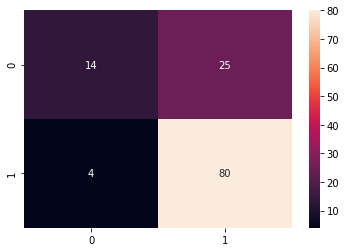

In [140]:
#logistic Regression without Stand
lgs = LogisticRegression( solver='lbfgs' ,max_iter = 120 ,verbose = 2)
lgs.fit(x_train ,y_train)
prd = lgs.predict(x_test)
c = confusion_matrix(y_test ,prd)
sns.heatmap(c,annot = True)
print(accuracy_score(y_test,prd))

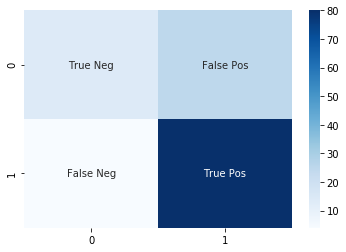

In [141]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(c,annot = labels , fmt= "",cmap = "Blues")

In [144]:
### Manual Hyperparameter Tuning
model=RandomForestClassifier(n_estimators=300,criterion='entropy',
                             max_features='sqrt',min_samples_leaf=10,random_state=100).fit(x_train,y_train)
predictions=model.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
#print(classification_report(y_test,predictions))


[[13 26]
 [ 2 82]]
0.7723577235772358


In [145]:
print(model.score(x_train,y_train) * 100)

81.87372708757637


In [102]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [114]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,
                               random_state=100,n_jobs = -1)
### fit the randomized model
rf_randomcv.fit(x_train,y_train)

KeyboardInterrupt: 